# Data Science Project
# Amsterdam & New York Airbnb Research

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
sns.set()
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

# EDA

## Loading the data

In [2]:
#Loading data
NY_Listings = pd.read_csv('listings-NY.csv')
NY_Reviews = pd.read_csv('reviews-NY.csv')

C:\Users\MARIYAM\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Loading data
AM_Listings = pd.read_csv('listings-AM.csv')
AM_Reviews = pd.read_csv('reviews-AM.csv')

C:\Users\MARIYAM\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleaning

In [4]:
NY_Listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,https://www.airbnb.com/rooms/3647,20190912153101,2019-09-13,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,https://www.airbnb.com/rooms/3831,20190912153101,2019-09-13,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,https://www.airbnb.com/rooms/5022,20190912153101,2019-09-13,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10
3,5099,https://www.airbnb.com/rooms/5099,20190912153101,2019-09-13,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.59
4,5121,https://www.airbnb.com/rooms/5121,20190912153101,2019-09-13,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.39


In [5]:
NY_Reviews.head(5)

,listing_id,date
0,3831,2014-09-30
1,3831,2014-11-02
2,3831,2014-11-09
3,3831,2014-11-19
4,3831,2014-12-06


In [6]:
AM_Listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190914033014,2019-09-14,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
1,20168,https://www.airbnb.com/rooms/20168,20190914033014,2019-09-14,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.48
2,25428,https://www.airbnb.com/rooms/25428,20190914033014,2019-09-14,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.15
3,27886,https://www.airbnb.com/rooms/27886,20190914033014,2019-09-14,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.14
4,28871,https://www.airbnb.com/rooms/28871,20190914033014,2019-09-14,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.67


In [7]:
AM_Reviews.head(5)

,listing_id,date
0,2818,2009-03-30
1,2818,2009-04-24
2,2818,2009-05-03
3,2818,2009-05-18
4,2818,2009-05-25


In [8]:
# Chosing the relevant attributes for our listing dataset of New York
NY_Listings = NY_Listings.iloc[:,[0,19,33,36,37,40,41,60,83,86,105]]

# Filtering only New York City's data from the state of New York
NY_Listings = NY_Listings[NY_Listings["city"] == "New York"]

In [9]:
# Chosing the relevant attributes for our listing dataset of New York
AM_Listings = AM_Listings.iloc[:,[0,19,33,36,37,39,41,60,83,86,105]]


In [10]:
AM_Listings = AM_Listings.rename(columns= {"neighbourhood_cleansed" : "neighbourhood_group_cleansed"})
# AM_Listings.head(5)

In [11]:
# Checkig NaN values in NY Listings
NY_Listings.isnull().sum()

id                                 0
host_id                            0
host_total_listings_count          7
host_identity_verified             7
street                             0
neighbourhood_group_cleansed       0
city                               0
price                              0
number_of_reviews_ltm              0
review_scores_rating            5355
reviews_per_month               4929
dtype: int64

In [12]:
# Checkig NaN values in NY Listings
AM_Listings.isnull().sum()

id                                 0
host_id                            0
host_total_listings_count          5
host_identity_verified             5
street                             0
neighbourhood_group_cleansed       0
city                               4
price                              0
number_of_reviews_ltm              0
review_scores_rating            2565
reviews_per_month               2342
dtype: int64

In [13]:
#Checking NaN values in NY Reviews
NY_Reviews.isnull().sum()

listing_id    0
date          0
dtype: int64

In [14]:
#Checking NaN values in NY Reviews
AM_Reviews.isnull().sum()

listing_id    0
date          0
dtype: int64

In [15]:
# Converting Date to Datetime and trimming data to consider values from 2015
NY_Reviews["date"]= pd.to_datetime(NY_Reviews['date'])
NY_Reviews = NY_Reviews[NY_Reviews['date'].dt.year > 2009]
NY_Reviews = NY_Reviews.reset_index()

In [16]:
# Converting Date to Datetime and trimming data to consider values from 2015
AM_Reviews["date"]= pd.to_datetime(AM_Reviews['date'])
AM_Reviews = AM_Reviews[AM_Reviews['date'].dt.year > 2009]
AM_Reviews = AM_Reviews.reset_index()

In [17]:
# Removing anomalies and replacing symbols
NY_Listings['review_scores_rating'] = NY_Listings['review_scores_rating'].replace(np.NaN, 0)
NY_Listings['reviews_per_month'] = NY_Listings['reviews_per_month'].replace(np.NaN, 0)
NY_Listings['price'] = NY_Listings['price'].replace({'\$': ''}, regex = True) # removing $ sign
NY_Listings['price'] = NY_Listings['price'].replace({'\,': ''}, regex = True) # removing ,
NY_Listings['price']= NY_Listings['price'].astype(float)
NY_Listings = NY_Listings[NY_Listings['host_identity_verified'].notna() == True] # removing rows where NaN values were there for host verification

In [18]:
# Removing anomalies and replacing symbols
AM_Listings['review_scores_rating'] = AM_Listings['review_scores_rating'].replace(np.NaN, 0)
AM_Listings['reviews_per_month'] = AM_Listings['reviews_per_month'].replace(np.NaN, 0)
AM_Listings['price'] = AM_Listings['price'].replace({'\$': ''}, regex = True) # removing $ sign
AM_Listings['price'] = AM_Listings['price'].replace({'\,': ''}, regex = True) # removing ,
AM_Listings['price']= AM_Listings['price'].astype(float)
AM_Listings = AM_Listings[AM_Listings['host_identity_verified'].notna() == True] # removing rows where NaN values were there for host verification
AM_Listings = AM_Listings[AM_Listings['city'].notna() == True] # removing rows where NaN values were there for host verification

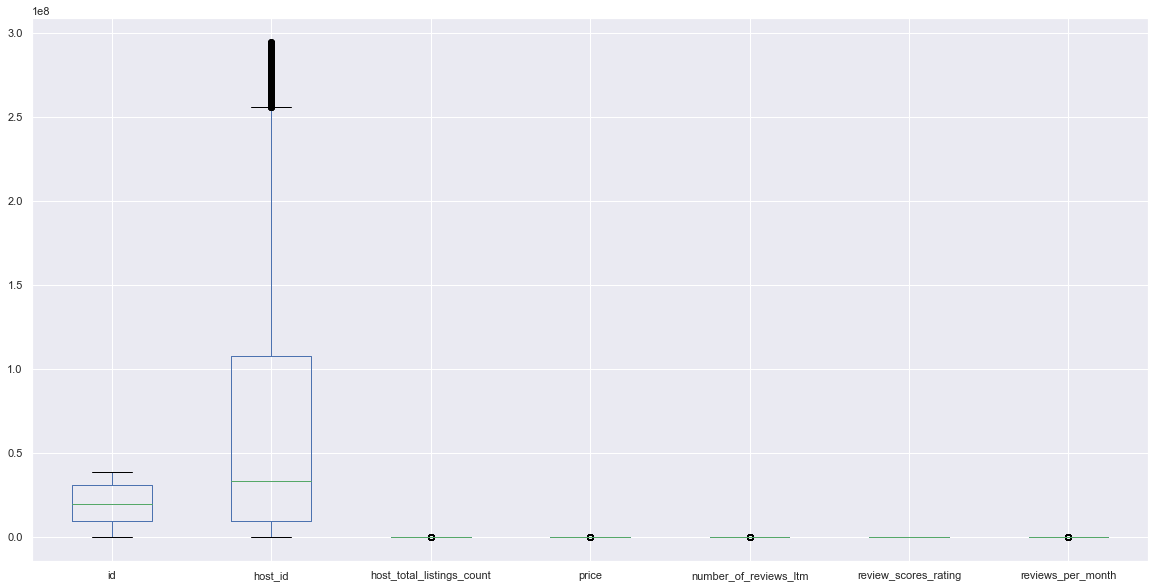

In [19]:
#Boxplot
#No anomalies found as all data is discrete
plt.figure(figsize=(20, 10))
NY_Listings.boxplot()

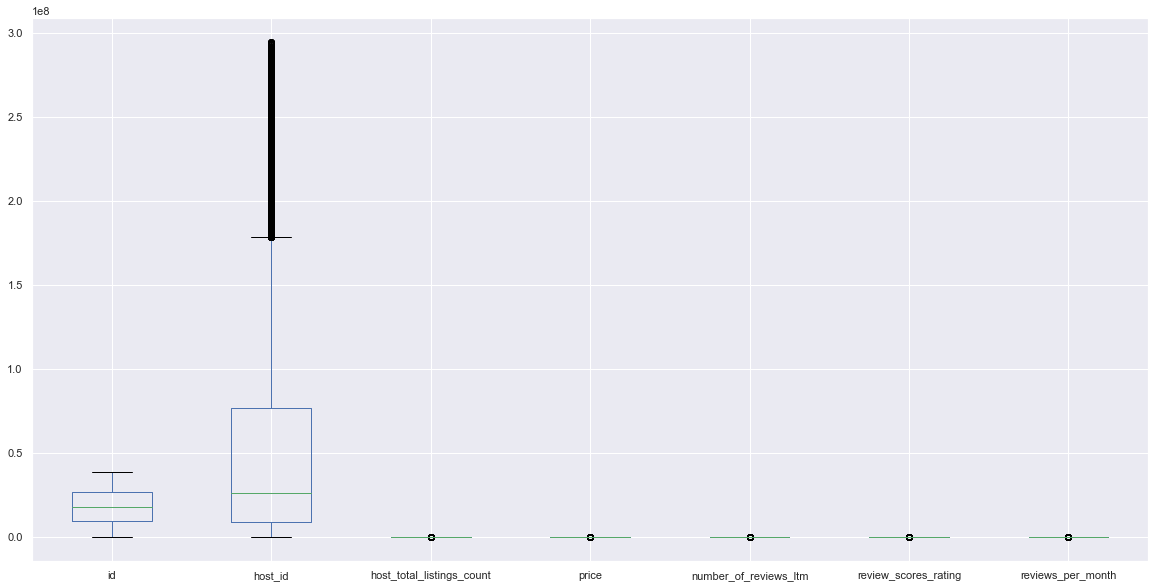

In [20]:
#Boxplot
#No anomalies found as all data is discrete
plt.figure(figsize=(20, 10))
AM_Listings.boxplot()

In [21]:
# Checkig NaN values
NY_Listings.isnull().sum()

id                              0
host_id                         0
host_total_listings_count       0
host_identity_verified          0
street                          0
neighbourhood_group_cleansed    0
city                            0
price                           0
number_of_reviews_ltm           0
review_scores_rating            0
reviews_per_month               0
dtype: int64

In [22]:
# Checkig NaN values
AM_Listings.isnull().sum()

id                              0
host_id                         0
host_total_listings_count       0
host_identity_verified          0
street                          0
neighbourhood_group_cleansed    0
city                            0
price                           0
number_of_reviews_ltm           0
review_scores_rating            0
reviews_per_month               0
dtype: int64

# Data exploration

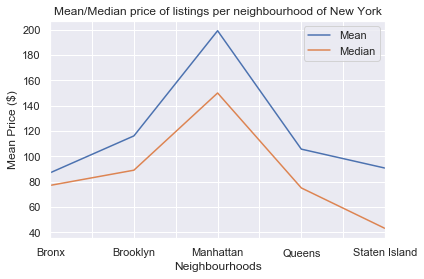

In [23]:
#Mean/Median price of listings per neighbourhood of New York
Mean_Listings_DF = NY_Listings['price'].groupby(NY_Listings['neighbourhood_group_cleansed']).mean()
Median_Listings_DF = NY_Listings['price'].groupby(NY_Listings['neighbourhood_group_cleansed']).median()
Mean_Listings_DF.sort_values()
Mean_Listings_DF.plot(label = "Mean")
Median_Listings_DF.plot(label = "Median")
plt.title("Mean/Median price of listings per neighbourhood of New York")
plt.ylabel("Mean Price (\$)")
plt.xlabel("Neighbourhoods")
plt.legend()

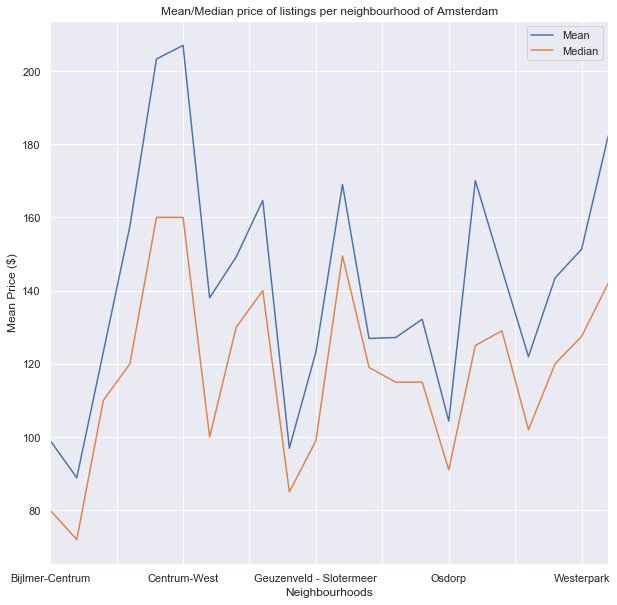

In [24]:
#Mean/Median price of listings per neighbourhood of Amsterdam
Mean_Listings_DF = AM_Listings['price'].groupby(AM_Listings['neighbourhood_group_cleansed']).mean()
Median_Listings_DF = AM_Listings['price'].groupby(AM_Listings['neighbourhood_group_cleansed']).median()
Mean_Listings_DF.sort_values()
plt.figure(figsize=(10, 10))
Mean_Listings_DF.plot(label = "Mean")
Median_Listings_DF.plot(label = "Median")
plt.title("Mean/Median price of listings per neighbourhood of Amsterdam")
plt.ylabel("Mean Price (\$)")
plt.xlabel("Neighbourhoods")
plt.legend()

Text(0.5, 1.0, 'Mean price of listings per neighbourhood of New York')

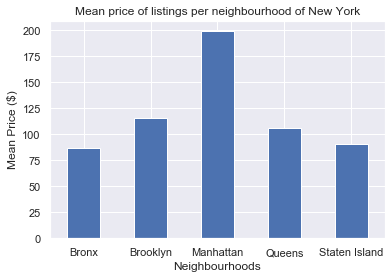

In [25]:
#Mean price of listings per neighbourhood of New York
temp_df = NY_Listings['price'].groupby(NY_Listings['neighbourhood_group_cleansed']).mean()
temp_df.sort_values()
temp_df.plot.bar(rot = 0)
plt.ylabel("Mean Price (\$)")
plt.xlabel("Neighbourhoods")
plt.title("Mean price of listings per neighbourhood of New York")

Text(0.5, 1.0, 'Mean price of listings per neighbourhood of Amsterdam')

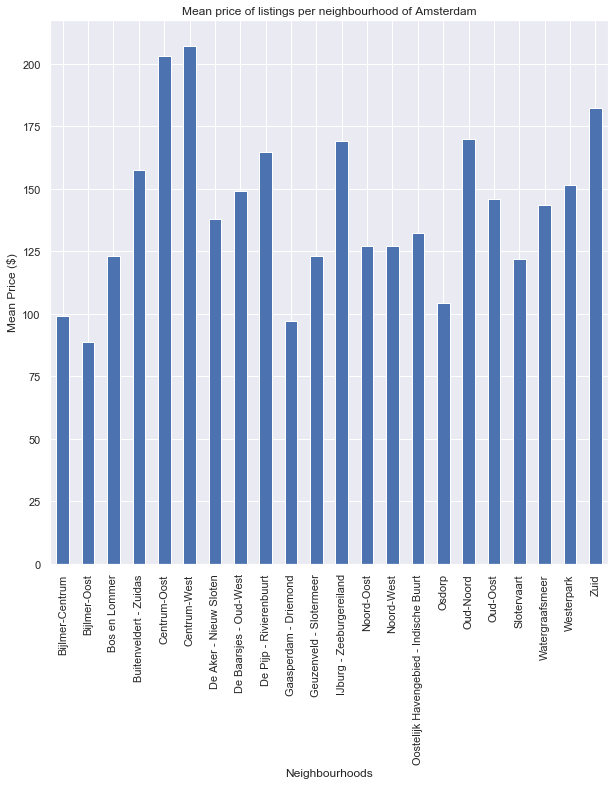

In [26]:
#Mean price of listings per neighbourhood of Amsterdam
temp_df = AM_Listings['price'].groupby(AM_Listings['neighbourhood_group_cleansed']).mean()
temp_df.sort_values()
plt.figure(figsize=(10, 10))
temp_df.plot.bar(rot = 90)
plt.ylabel("Mean Price (\$)")
plt.xlabel("Neighbourhoods")
plt.title("Mean price of listings per neighbourhood of Amsterdam")

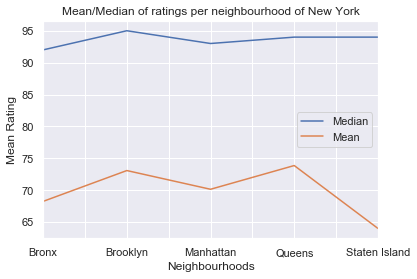

In [27]:
#Mean/Median ratings of listings per neighbourhood of New York
Mean_Listings_DF = NY_Listings['review_scores_rating'].groupby(NY_Listings['neighbourhood_group_cleansed']).mean()
Median_Listings_DF = NY_Listings['review_scores_rating'].groupby(NY_Listings['neighbourhood_group_cleansed']).median()
Mean_Listings_DF.sort_values()
Median_Listings_DF.plot(label = "Median")
Mean_Listings_DF.plot(label = "Mean")
plt.title("Mean/Median of ratings per neighbourhood of New York")
plt.ylabel("Mean Rating")
plt.xlabel("Neighbourhoods")
plt.legend()

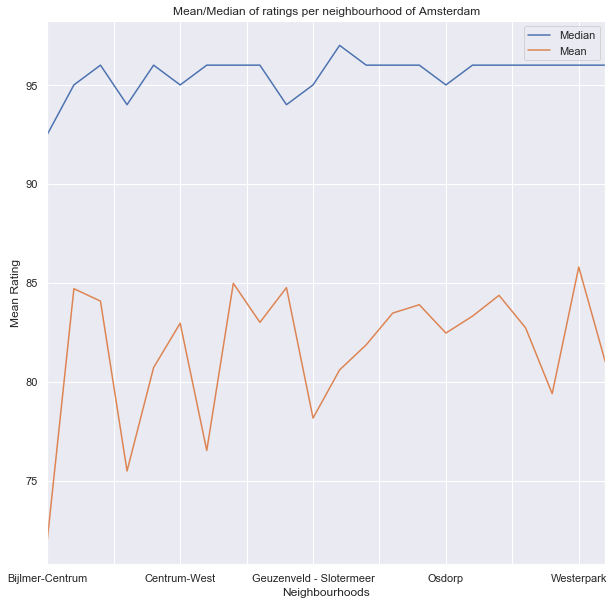

In [28]:
#Mean/Median ratings of listings per neighbourhood of Amsterdam
Mean_Listings_DF = AM_Listings['review_scores_rating'].groupby(AM_Listings['neighbourhood_group_cleansed']).mean()
Median_Listings_DF = AM_Listings['review_scores_rating'].groupby(AM_Listings['neighbourhood_group_cleansed']).median()
Mean_Listings_DF.sort_values()
plt.figure(figsize=(10, 10))
Median_Listings_DF.plot(label = "Median")
Mean_Listings_DF.plot(label = "Mean")
plt.title("Mean/Median of ratings per neighbourhood of Amsterdam")
plt.ylabel("Mean Rating")
plt.xlabel("Neighbourhoods")
plt.legend()

Text(0.5, 1.0, 'Mean ratings of listings per neighbourhood of New York')

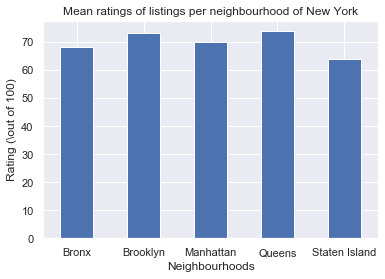

In [29]:
#Mean ratings of listings per neighbourhood of New York
Mean_Listings_DF = NY_Listings['review_scores_rating'].groupby(NY_Listings['neighbourhood_group_cleansed']).mean()
Mean_Listings_DF.sort_values()
Mean_Listings_DF.plot.bar(rot = 0)
plt.ylabel("Rating (\out of 100)")
plt.xlabel("Neighbourhoods")
plt.title("Mean ratings of listings per neighbourhood of New York")

Text(0.5, 1.0, 'Mean ratings of listings per neighbourhood of Amsterdam')

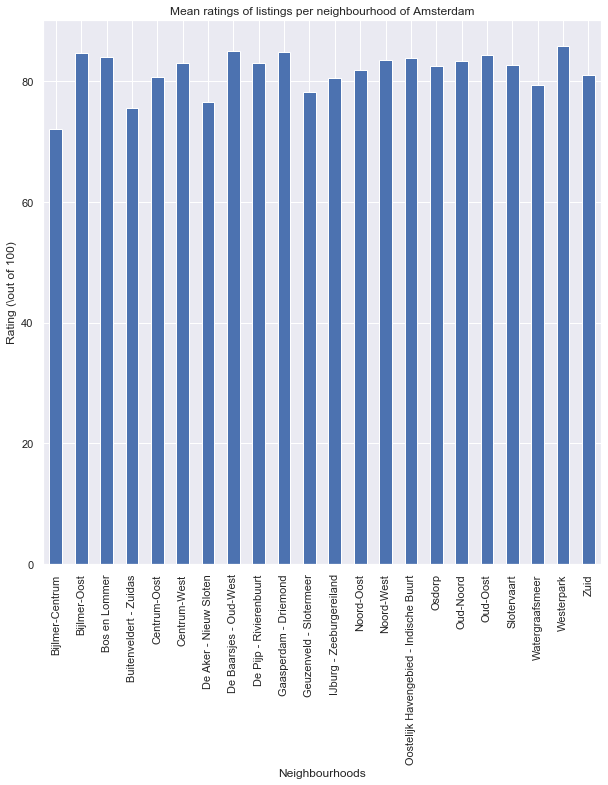

In [30]:
#Mean ratings of listings per neighbourhood of Amsterdam
Mean_Listings_DF = AM_Listings['review_scores_rating'].groupby(AM_Listings['neighbourhood_group_cleansed']).mean()
Mean_Listings_DF.sort_values()
plt.figure(figsize=(10, 10))
Mean_Listings_DF.plot.bar(rot = 90)
plt.ylabel("Rating (\out of 100)")
plt.xlabel("Neighbourhoods")
plt.title("Mean ratings of listings per neighbourhood of Amsterdam")

Text(0.5, 1.0, 'Mean ratings of listings by Host Verification of New York')

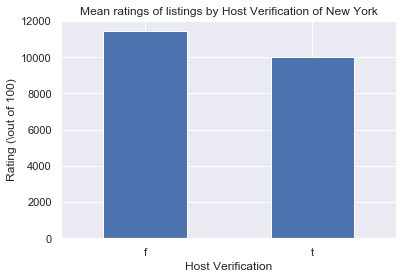

In [31]:
#Mean ratings of listings by Host Verification of New York
Count_Listings_DF = NY_Listings['review_scores_rating'].groupby(NY_Listings['host_identity_verified']).count()
Count_Listings_DF.sort_values()
Count_Listings_DF.plot.bar(rot = 0)
plt.ylabel("Rating (\out of 100)")
plt.xlabel("Host Verification")
plt.title("Mean ratings of listings by Host Verification of New York")

Text(0.5, 1.0, 'Mean ratings of listings by Host Verification of Amsterdam')

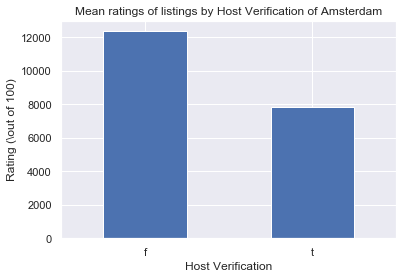

In [32]:
#Mean ratings of listings by Host Verification of Amsterdam
Count_Listings_DF = AM_Listings['review_scores_rating'].groupby(AM_Listings['host_identity_verified']).count()
Count_Listings_DF.sort_values()
Count_Listings_DF.plot.bar(rot = 0)
plt.ylabel("Rating (\out of 100)")
plt.xlabel("Host Verification")
plt.title("Mean ratings of listings by Host Verification of Amsterdam")

In [33]:
#Bookings for listing IDs for state of New York
NY_Reviews_Count = NY_Reviews[['date']].groupby(NY_Reviews['listing_id']).count()
NY_Reviews_Count.columns = ['Booking']

In [34]:
#Bookings for listing IDs for state of New York
AM_Reviews_Count = AM_Reviews[['date']].groupby(AM_Reviews['listing_id']).count()
AM_Reviews_Count.columns = ['Booking']

In [35]:
# #Adding attributes
NY_Combined_DF = pd.merge(NY_Listings, NY_Reviews_Count, left_on='id', right_on='listing_id')

In [36]:
# #Adding attributes
AM_Combined_DF = pd.merge(AM_Listings, AM_Reviews_Count, left_on='id', right_on='listing_id')

In [37]:
NY_Combined_DF.head()

,id,host_id,host_total_listings_count,host_identity_verified,street,neighbourhood_group_cleansed,city,price,number_of_reviews_ltm,review_scores_rating,reviews_per_month,Booking
0,5022,7192,1.0,t,"New York, NY, United States",Manhattan,New York,80.0,2,93.0,0.10,9
1,5099,7322,1.0,f,"New York, NY, United States",Manhattan,New York,200.0,10,89.0,0.59,62
2,5178,8967,1.0,f,"New York, NY, United States",Manhattan,New York,79.0,49,83.0,3.51,433
3,5203,7490,1.0,t,"New York, NY, United States",Manhattan,New York,79.0,0,98.0,0.97,114
4,5222,7516,1.0,t,"New York, NY, United States",Manhattan,New York,116.0,0,95.0,0.73,80


In [38]:
AM_Combined_DF.head()

,id,host_id,host_total_listings_count,host_identity_verified,street,neighbourhood_group_cleansed,city,price,number_of_reviews_ltm,review_scores_rating,reviews_per_month,Booking
0,2818,3159,1.0,f,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,Amsterdam,59.0,28,98.0,2.11,257
1,20168,59484,2.0,f,"Amsterdam, North Holland, Netherlands",Centrum-Oost,Amsterdam,80.0,68,88.0,2.48,288
2,25428,56142,2.0,f,"Amsterdam, North Holland, Netherlands",Centrum-West,Amsterdam,125.0,2,100.0,0.15,3
3,27886,97647,1.0,t,"Amsterdam, North Holland, Netherlands",Centrum-West,Amsterdam,155.0,41,99.0,2.14,200
4,28871,124245,3.0,t,"Amsterdam, North Holland, Netherlands",Centrum-West,Amsterdam,75.0,103,97.0,2.67,295


Text(0.5, 1.0, 'Number of Bookings per neighbourhoods of New York')

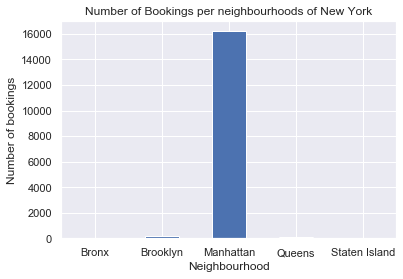

In [39]:
# Frequency of Airbnb Bookings per neighbourhood in New York
temp_df = NY_Combined_DF['Booking'].groupby(NY_Combined_DF['neighbourhood_group_cleansed']).count()
temp_df.plot.bar(rot = 0)
plt.ylabel("Number of bookings")
plt.xlabel("Neighbourhood")
plt.title("Number of Bookings per neighbourhoods of New York")

Text(0.5, 1.0, 'Number of Bookings per neighbourhoods of Amsterdam')

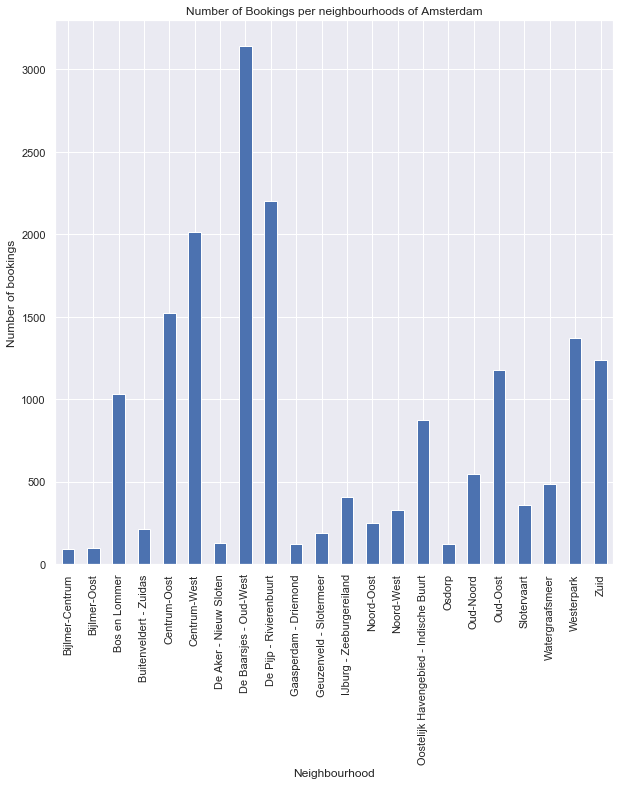

In [40]:
# Frequency of Airbnb Bookings per neighbourhood in Amsterdam
temp_df = AM_Combined_DF['Booking'].groupby(AM_Combined_DF['neighbourhood_group_cleansed']).count()
plt.figure(figsize=(10, 10))
temp_df.plot.bar(rot = 90)
plt.ylabel("Number of bookings")
plt.xlabel("Neighbourhood")
plt.title("Number of Bookings per neighbourhoods of Amsterdam")

Text(0.5, 1.0, 'Average Ratings per Neighbourhood')

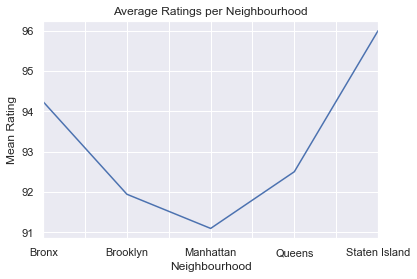

In [41]:
# Ratings per neighborhood in New York
temp_df = NY_Combined_DF['review_scores_rating'].groupby(NY_Combined_DF['neighbourhood_group_cleansed']).mean()
temp_df.plot()
plt.ylabel("Mean Rating")
plt.xlabel("Neighbourhood")
plt.title("Average Ratings per Neighbourhood")

Text(0.5, 1.0, 'Average Ratings per Neighbourhood')

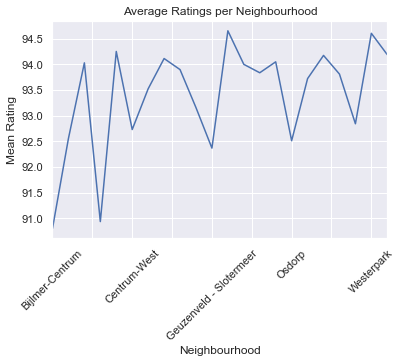

In [42]:
# Ratings per neighborhood in Amsterdam
temp_df = AM_Combined_DF['review_scores_rating'].groupby(AM_Combined_DF['neighbourhood_group_cleansed']).mean()
temp_df.plot(rot = 45)
plt.ylabel("Mean Rating")
plt.xlabel("Neighbourhood")
plt.title("Average Ratings per Neighbourhood")

Text(0.5, 1.0, 'Number of Bookings by Host Verification in New York')

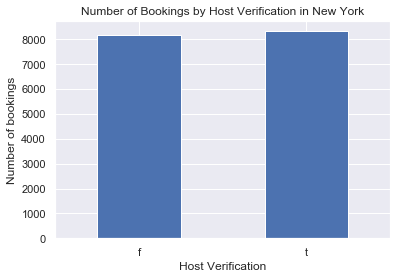

In [43]:
# Number of bookings with respect to host verification
# t is verified, f is unverified
temp_df = NY_Combined_DF['Booking'].groupby(NY_Combined_DF['host_identity_verified']).count()
temp_df.plot.bar(rot = 0)
plt.ylabel("Number of bookings")
plt.xlabel("Host Verification")
plt.title("Number of Bookings by Host Verification in New York")

Text(0.5, 1.0, 'Number of Bookings by Host Verification in Amsterdam')

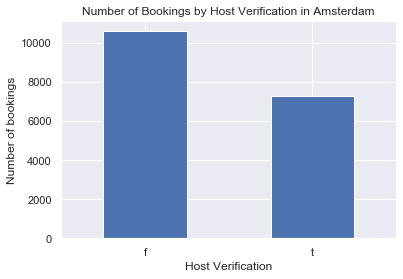

In [44]:
# Number of bookings with respect to host verification
# t is verified, f is unverified
temp_df = AM_Combined_DF['Booking'].groupby(AM_Combined_DF['host_identity_verified']).count()
temp_df.plot.bar(rot = 0)
plt.ylabel("Number of bookings")
plt.xlabel("Host Verification")
plt.title("Number of Bookings by Host Verification in Amsterdam")

Text(0.5, 1.0, 'Number of Bookings per Ratings in New York')

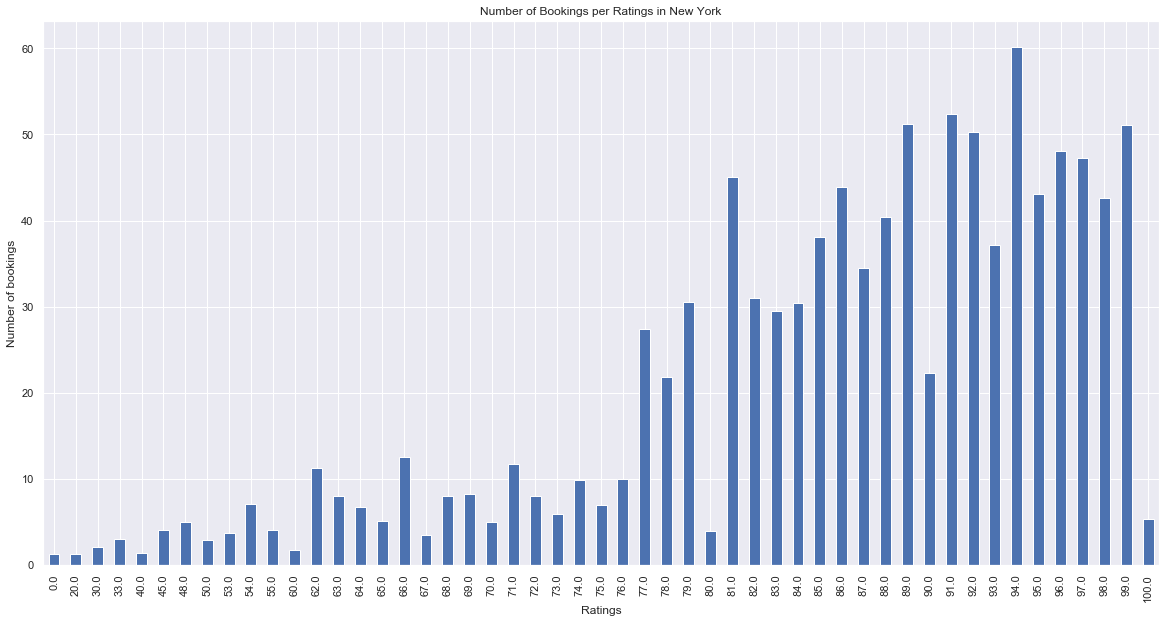

In [45]:
# Effect of number of reviews of Airbnb Booking
temp_df = NY_Combined_DF['Booking'].groupby(NY_Combined_DF['review_scores_rating']).mean()
plt.figure(figsize=(20, 10))
temp_df.plot.bar(rot = 90)
plt.ylabel("Number of bookings")
plt.xlabel("Ratings")
plt.title("Number of Bookings per Ratings in New York")

Text(0.5, 1.0, 'Number of Bookings per Ratings in Amsterdam')

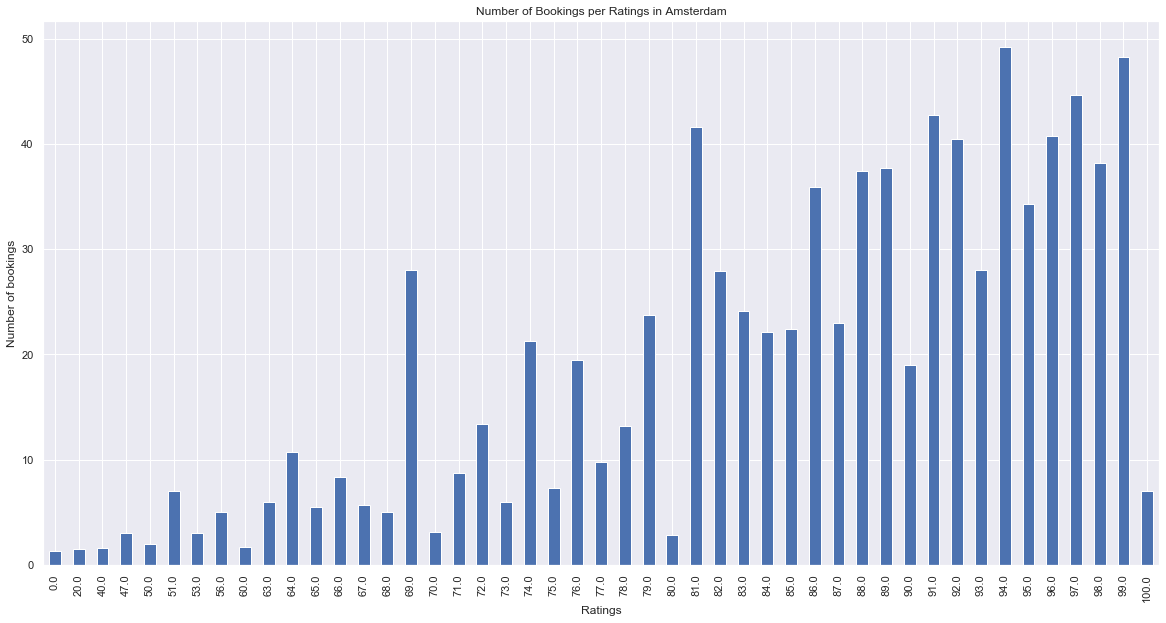

In [46]:
# Effect of number of reviews of Airbnb Booking
temp_df = AM_Combined_DF['Booking'].groupby(AM_Combined_DF['review_scores_rating']).mean()
plt.figure(figsize=(20, 10))
temp_df.plot.bar(rot = 90)
plt.ylabel("Number of bookings")
plt.xlabel("Ratings")
plt.title("Number of Bookings per Ratings in Amsterdam")

Text(0.5, 1.0, 'Number of Bookings per Month in New York')

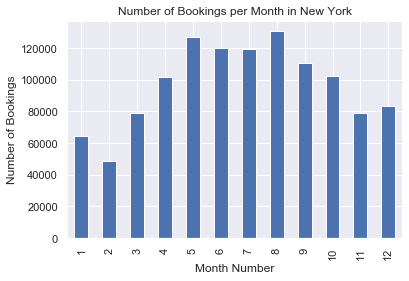

In [47]:
# Number of bookings per month
temp_df = NY_Reviews[['date']].groupby(NY_Reviews['date'].dt.month).count()
temp_df.plot.bar(legend=False)
plt.ylabel("Number of Bookings")
plt.xlabel("Month Number")
plt.title("Number of Bookings per Month in New York")

Text(0.5, 1.0, 'Number of Bookings per Month in Amsterdam')

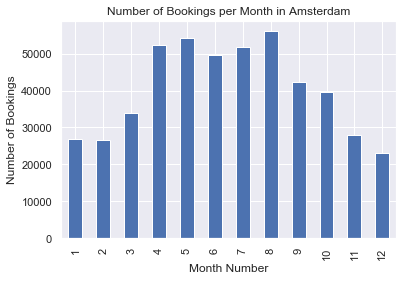

In [48]:
# Number of bookings per month
temp_df = AM_Reviews[['date']].groupby(AM_Reviews['date'].dt.month).count()
temp_df.plot.bar(legend=False)
plt.ylabel("Number of Bookings")
plt.xlabel("Month Number")
plt.title("Number of Bookings per Month in Amsterdam")

Text(0.5, 1.0, 'Number of Bookings per Season in New York')

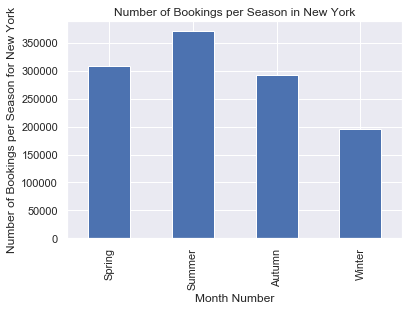

In [49]:
# Frequency of Bookings per Neighbourhood According to Season
# spring (March, April, May)
# summer (June, July, August)
# autumn (September, October, November)
# winter (December, January, February)

temp_season_NY = pd.DataFrame(columns = ['Spring', 'Summer', 'Autumn', 'Winter'])
temp_df = NY_Reviews[['date']].groupby(NY_Reviews['date'].dt.month).count()
temp_season_NY['Spring'] = temp_df[2:5].sum()
temp_season_NY['Summer'] = temp_df[5:8].sum()
temp_season_NY['Autumn'] = temp_df[8:11].sum()
temp_season_NY['Winter'] = temp_df.iloc[[0,1,11],:].sum()
temp_season_NY = temp_season_NY.transpose()

temp_season_NY.plot.bar(legend=False)
plt.ylabel("Number of Bookings per Season for New York")
plt.xlabel("Month Number")
plt.title("Number of Bookings per Season in New York")

Text(0.5, 1.0, 'Number of Bookings per Seasons in Amsterdam')

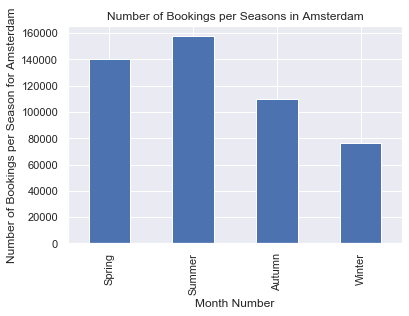

In [50]:
# Frequency of Bookings per Neighbourhood According to Season
# spring (March, April, May)
# summer (June, July, August)
# autumn (September, October, November)
# winter (December, January, February)

temp_season_AM = pd.DataFrame(columns = ['Spring', 'Summer', 'Autumn', 'Winter'])
temp_df = AM_Reviews[['date']].groupby(AM_Reviews['date'].dt.month).count()
temp_season_AM['Spring'] = temp_df[2:5].sum()
temp_season_AM['Summer'] = temp_df[5:8].sum()
temp_season_AM['Autumn'] = temp_df[8:11].sum()
temp_season_AM['Winter'] = temp_df.iloc[[0,1,11],:].sum()
temp_season_AM = temp_season_AM.transpose()

temp_season_AM.plot.bar(legend=False)
plt.ylabel("Number of Bookings per Season for Amsterdam")
plt.xlabel("Month Number")
plt.title("Number of Bookings per Seasons in Amsterdam")

Text(0, 0.5, 'Bookings')

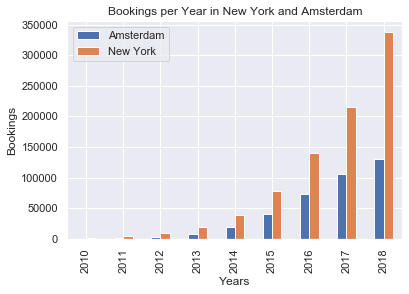

In [51]:
#Separating the number of bookings into years in Amsterdam
temp_year_AM = pd.DataFrame(columns = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
temp_df = AM_Reviews[['date']].groupby(AM_Reviews['date'].dt.year).count()
temp_year_AM['2010'] = temp_df.iloc[0, :]
temp_year_AM['2011'] = temp_df.iloc[1, :]
temp_year_AM['2012'] = temp_df.iloc[2, :]
temp_year_AM['2013'] = temp_df.iloc[3, :]
temp_year_AM['2014'] = temp_df.iloc[4, :]
temp_year_AM['2015'] = temp_df.iloc[5, :]
temp_year_AM['2016'] = temp_df.iloc[6, :]
temp_year_AM['2017'] = temp_df.iloc[7, :]
temp_year_AM['2018'] = temp_df.iloc[8, :]

#Separating the number of bookings into years in New York
temp_year_NY = pd.DataFrame(columns = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
temp_df_NY = NY_Reviews[['date']].groupby(NY_Reviews['date'].dt.year).count()
temp_year_NY['2010'] = temp_df_NY.iloc[0, :]
temp_year_NY['2011'] = temp_df_NY.iloc[1, :]
temp_year_NY['2012'] = temp_df_NY.iloc[2, :]
temp_year_NY['2013'] = temp_df_NY.iloc[3, :]
temp_year_NY['2014'] = temp_df_NY.iloc[4, :]
temp_year_NY['2015'] = temp_df_NY.iloc[5, :]
temp_year_NY['2016'] = temp_df_NY.iloc[6, :]
temp_year_NY['2017'] = temp_df_NY.iloc[7, :]
temp_year_NY['2018'] = temp_df_NY.iloc[8, :]

temp_year_AM = temp_year_AM.transpose()
temp_year_NY = temp_year_NY.transpose()

temp_year = pd.DataFrame(columns = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
temp_year = temp_year_AM
temp_year['DateNY'] = temp_year_NY
temp_year = temp_year.rename(columns= {'date': "Amsterdam", 'DateNY': "New York"})
temp_year
temp_year.plot.bar()
plt.title('Bookings per Year in New York and Amsterdam')
plt.xlabel('Years')
plt.ylabel('Bookings')

Text(0, 0.5, 'Bookings')

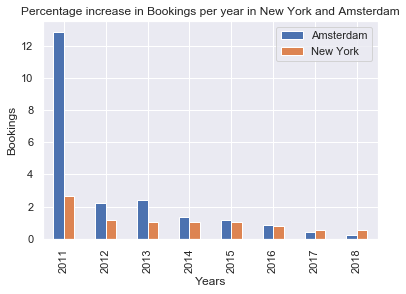

In [52]:
#Calculating the increase   in Amsterdam
temp_year_AM = pd.DataFrame(columns = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
temp_df = AM_Reviews[['date']].groupby(AM_Reviews['date'].dt.year).count()
temp_year_AM['2011'] = (temp_df.iloc[1, :]-temp_df.iloc[0, :])/temp_df.iloc[0, :]
temp_year_AM['2012'] = (temp_df.iloc[2, :]-temp_df.iloc[1, :])/temp_df.iloc[1, :]
temp_year_AM['2013'] = (temp_df.iloc[3, :]-temp_df.iloc[2, :])/temp_df.iloc[2, :]
temp_year_AM['2014'] = (temp_df.iloc[4, :]-temp_df.iloc[3, :])/temp_df.iloc[3, :]
temp_year_AM['2015'] = (temp_df.iloc[5, :]-temp_df.iloc[4, :])/temp_df.iloc[4, :]
temp_year_AM['2016'] = (temp_df.iloc[6, :]-temp_df.iloc[5, :])/temp_df.iloc[5, :]
temp_year_AM['2017'] = (temp_df.iloc[7, :]-temp_df.iloc[6, :])/temp_df.iloc[6, :]
temp_year_AM['2018'] = (temp_df.iloc[8, :]-temp_df.iloc[7, :])/temp_df.iloc[7, :]

temp_year_NY = pd.DataFrame(columns = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
temp_df_NY = NY_Reviews[['date']].groupby(NY_Reviews['date'].dt.year).count()
temp_year_NY['2011'] = (temp_df_NY.iloc[1, :]- temp_df_NY.iloc[0, :])/temp_df_NY.iloc[0, :]
temp_year_NY['2012'] = (temp_df_NY.iloc[2, :]- temp_df_NY.iloc[1, :])/temp_df_NY.iloc[1, :]
temp_year_NY['2013'] = (temp_df_NY.iloc[3, :]- temp_df_NY.iloc[2, :])/temp_df_NY.iloc[2, :]
temp_year_NY['2014'] = (temp_df_NY.iloc[4, :]- temp_df_NY.iloc[3, :])/temp_df_NY.iloc[3, :]
temp_year_NY['2015'] = (temp_df_NY.iloc[5, :]- temp_df_NY.iloc[4, :])/temp_df_NY.iloc[4, :]
temp_year_NY['2016'] = (temp_df_NY.iloc[6, :]- temp_df_NY.iloc[5, :])/temp_df_NY.iloc[5, :]
temp_year_NY['2017'] = (temp_df_NY.iloc[7, :]- temp_df_NY.iloc[6, :])/temp_df_NY.iloc[6, :]
temp_year_NY['2018'] = (temp_df_NY.iloc[8, :]- temp_df_NY.iloc[7, :])/temp_df_NY.iloc[7, :]

temp_year_AM = temp_year_AM.transpose()
temp_year_NY = temp_year_NY.transpose()

temp_year = pd.DataFrame(columns = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
temp_year = temp_year_AM
temp_year['DateNY'] = temp_year_NY
temp_year = temp_year.rename(columns= {'date': "Amsterdam", 'DateNY': "New York"})
temp_year
temp_year.plot.bar()
plt.title('Percentage increase in Bookings per year in New York and Amsterdam')
plt.xlabel('Years')
plt.ylabel('Bookings')

In [53]:
x_AM = [[2011], [2012], [2013], [2014], [2015], [2016], [2017], [2018]]
y_AM = temp_year['Amsterdam'].values.reshape(-1,1)

AM_regressor = LinearRegression()  
AM_regressor.fit(x_AM, y_AM)


x_NY = [[2011], [2012], [2013], [2014], [2015], [2016], [2017], [2018]]
y_NY = temp_year['New York'].values.reshape(-1,1)

NY_regressor = LinearRegression()  
NY_regressor.fit(x_NY, y_NY)

test = [[2011], [2012], [2013], [2014], [2015], [2016], [2017], [2018], [2019], [2020], [2021], [2022], [2023], [2024], [2025], [2026], [2027], [2028], [2029], [2030]]

AM_predicted = []
NY_predicted = []

for i in test:
    AM_predicted.append(AM_regressor.predict([i])[0][0])
    NY_predicted.append(NY_regressor.predict([i])[0][0])

predicted_graph = pd.DataFrame(columns = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030'])
predicted_graph = predicted_graph.transpose()
predicted_graph['New York'] = NY_predicted
predicted_graph['Amsterdam'] = AM_predicted
predicted_graph

,New York,Amsterdam
2011,1.858732,6.952398
2012,1.641089,5.732844
2013,1.423446,4.513290
2014,1.205803,3.293736
2015,0.988160,2.074182
2016,0.770517,0.854627
2017,0.552874,-0.364927
2018,0.335231,-1.584481
2019,0.117588,-2.804035
2020,-0.100055,-4.023589


Text(0.5, 1.0, 'Percentage Growth in Tourism Per Year for New York and Amsterdam using our Model')

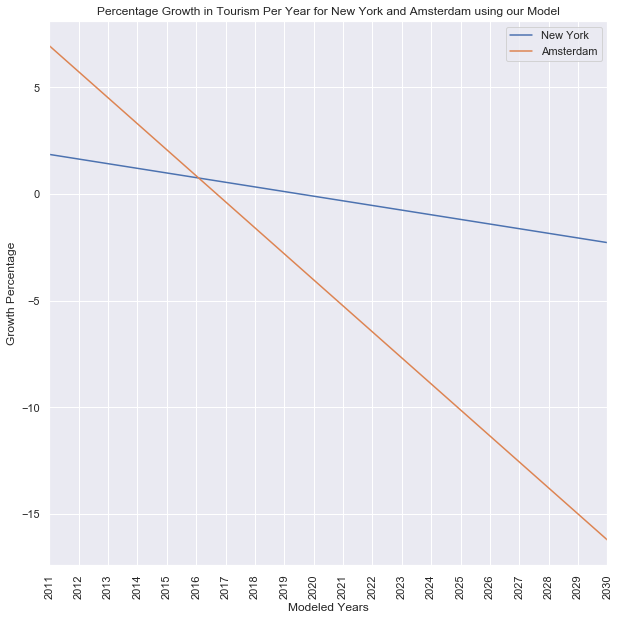

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.xaxis.set_major_locator(MultipleLocator(1))
predicted_graph['New York'].plot(rot = 90, legend = True)
predicted_graph['Amsterdam'].plot(rot = 90, legend = True)
plt.ylabel("Growth Percentage")
plt.xlabel("Modeled Years")
plt.title("Percentage Growth in Tourism Per Year for New York and Amsterdam using our Model")

In [55]:
 # Effect on rent near major holiday seasons

Text(0, 0.5, 'Ratings')

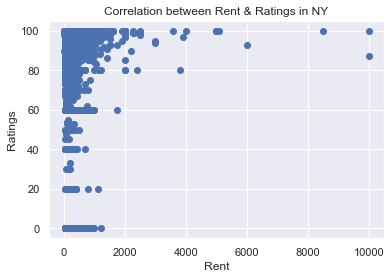

In [56]:
#Finding correlation between different variables
corr_array = []
relationship_matrix = []
correlation_pairs = []

# Rent & Rating 
temp = []
temp.append('Rent')
temp.append('Ratings')
correlation_pairs.append(temp)
corr_array.append(NY_Combined_DF['price'].corr(NY_Combined_DF['review_scores_rating']))
plt.scatter(NY_Combined_DF['price'], NY_Combined_DF['review_scores_rating'])
plt.title('Correlation between Rent & Ratings in NY')
plt.xlabel('Rent')
plt.ylabel('Ratings')

Text(0, 0.5, 'Ratings')

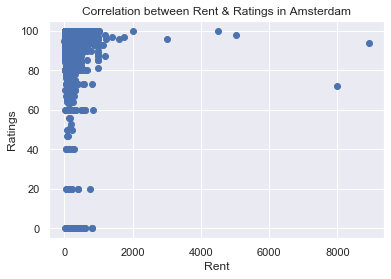

In [57]:
#Finding correlation between different variables
corr_array_AM = []
relationship_matrix_AM = []
correlation_pairs_AM = []

# Rent & Rating 
temp = []
temp.append('Rent')
temp.append('Ratings')
correlation_pairs_AM.append(temp)
corr_array_AM.append(AM_Combined_DF['price'].corr(AM_Combined_DF['review_scores_rating']))
plt.scatter(AM_Combined_DF['price'], AM_Combined_DF['review_scores_rating'])
plt.title('Correlation between Rent & Ratings in Amsterdam')
plt.xlabel('Rent')
plt.ylabel('Ratings')

Text(0, 0.5, 'Bookings')

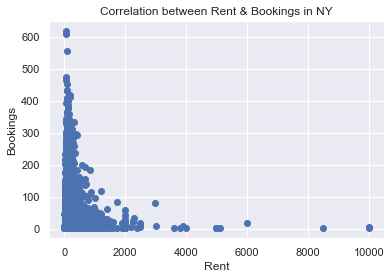

In [58]:
# Rent & Bookings
temp = []
temp.append('Rent')
temp.append('Bookings')
correlation_pairs.append(temp)
corr_array.append(NY_Combined_DF['price'].corr(NY_Combined_DF['Booking']))
plt.scatter(NY_Combined_DF['price'], NY_Combined_DF['Booking'])
plt.title('Correlation between Rent & Bookings in NY')
plt.xlabel('Rent')
plt.ylabel('Bookings')

Text(0, 0.5, 'Bookings')

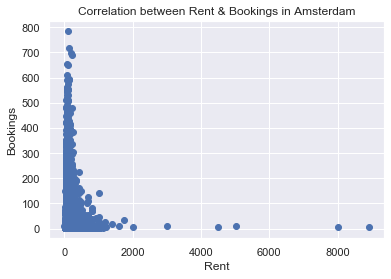

In [59]:
# Rent & Bookings
temp = []
temp.append('Rent')
temp.append('Bookings')
correlation_pairs_AM.append(temp)
corr_array_AM.append(AM_Combined_DF['price'].corr(AM_Combined_DF['Booking']))
plt.scatter(AM_Combined_DF['price'], AM_Combined_DF['Booking'])
plt.title('Correlation between Rent & Bookings in Amsterdam')
plt.xlabel('Rent')
plt.ylabel('Bookings')

Text(0, 0.5, 'Bookings')

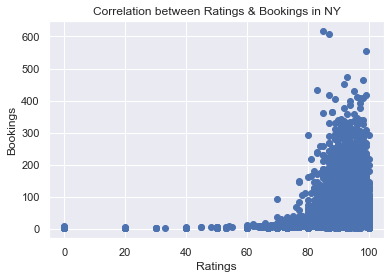

In [60]:
# Rating & Bookings
temp = []
temp.append('Rating')
temp.append('Bookings')
correlation_pairs.append(temp)
corr_array.append(NY_Combined_DF['review_scores_rating'].corr(NY_Combined_DF['Booking']))
plt.scatter(NY_Combined_DF['review_scores_rating'], NY_Combined_DF['Booking'])
plt.title('Correlation between Ratings & Bookings in NY')
plt.xlabel('Ratings')
plt.ylabel('Bookings')

Text(0, 0.5, 'Bookings')

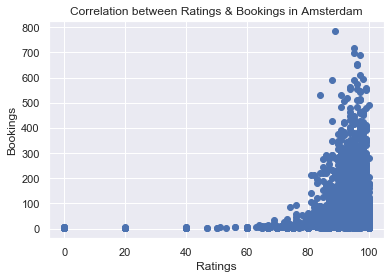

In [61]:
# Rating & Bookings
temp = []
temp.append('Rating')
temp.append('Bookings')
correlation_pairs_AM.append(temp)
corr_array_AM.append(AM_Combined_DF['review_scores_rating'].corr(AM_Combined_DF['Booking']))
plt.scatter(AM_Combined_DF['review_scores_rating'], AM_Combined_DF['Booking'])
plt.title('Correlation between Ratings & Bookings in Amsterdam')
plt.xlabel('Ratings')
plt.ylabel('Bookings')

In [62]:
for i in corr_array:
    if i == 0:
        relationship_matrix.append('Not Related')
    elif i == 1:
        relationship_matrix.append('Perfect Positive Linear')
    elif i == -1:
        relationship_matrix.append('Perfect Negative Linear')
    elif i > 0 and i <= 0.3:
        relationship_matrix.append('Weak Positive Linear')
    elif i < 0 and i >= -0.3:
        relationship_matrix.append('Weak Negative Linear')
    elif i > 0.3 and i <= 0.7:
        relationship_matrix.append('Moderate Positive Linear')
    elif i < -0.3 and i >= -0.7:
        relationship_matrix.append('Moderate Negative Linear')
    elif i > 0.7 and i < 1:
        relationship_matrix.append('Strong Positive Linear')
    elif i < -0.7 and i > -1:
        relationship_matrix.append('Strong Negative Linear')
    
for i, y in zip(correlation_pairs, relationship_matrix):
    print("The relationship between", i[0], "and", i[1], "is:", y)

The relationship between Rent and Ratings is: Weak Positive Linear
The relationship between Rent and Bookings is: Weak Negative Linear
The relationship between Rating and Bookings is: Weak Positive Linear


In [64]:
for i in corr_array_AM:
    if i == 0:
        relationship_matrix_AM.append('Not Related')
    elif i == 1:
        relationship_matrix_AM.append('Perfect Positive Linear')
    elif i == -1:
        relationship_matrix_AM.append('Perfect Negative Linear')
    elif i > 0 and i <= 0.3:
        relationship_matrix_AM.append('Weak Positive Linear')
    elif i < 0 and i >= -0.3:
        relationship_matrix_AM.append('Weak Negative Linear')
    elif i > 0.3 and i <= 0.7:
        relationship_matrix_AM.append('Moderate Positive Linear')
    elif i < -0.3 and i >= -0.7:
        relationship_matrix_AM.append('Moderate Negative Linear')
    elif i > 0.7 and i < 1:
        relationship_matrix_AM.append('Strong Positive Linear')
    elif i < -0.7 and i > -1:
        relationship_matrix_AM.append('Strong Negative Linear')
    
for i, y in zip(correlation_pairs_AM, relationship_matrix_AM):
    print("The relationship between", i[0], "and", i[1], "is:", y)

The relationship between Rent and Ratings is: Weak Positive Linear
The relationship between Rent and Bookings is: Weak Negative Linear
The relationship between Rating and Bookings is: Weak Positive Linear
